In [581]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

# Clustering and Pipelines
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Saving
import pickle

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [525]:
df_eda = pd.read_csv("../data/processed/df_eda.csv")
df_eda.head()

Patient_Age  Mother_inherit  Father_inherit  Maternal_gene  Paternal_gene   
0          2.0             1.0             0.0            1.0            0.0  \
1          6.0             1.0             0.0            0.0            0.0   
2         12.0             1.0             0.0            1.0            0.0   
3         11.0             1.0             0.0            1.0            1.0   
4         14.0             1.0             0.0            1.0            0.0   

   Blood_cell_count  Mother_age  Father_age  Status  Respiratory_rate  ...   
0          4.760603   34.886364   42.378320     0.0               0.0  ...  \
1          4.893297   41.000000   22.000000     0.0               0.0  ...   
2          4.705280   21.000000   41.706436     1.0               1.0  ...   
3          4.720703   32.000000   40.742424     0.0               1.0  ...   
4          5.103188   34.601513   42.015587     1.0               0.0  ...   

   Radiation_exposure  Substance_abuse  Assisted_conception   
0                 0.0              0.0                  0.0  \
1                 1.0              0.0                  1.0   
2                 0.0              0.0                  1.0   
3                 0.0              0.0                  1.0   
4                 0.0              0.0                  1.0   

   History_previous_pregnancies  Number_abortions  Birth_defects  WBC_count   
0                           1.0           1.97191            0.0   9.857562  \
1                           1.0           4.00000            1.0   7.474796   
2                           1.0           1.00000            1.0   7.919321   
3                           0.0           4.00000            0.0   4.098210   
4                           0.0           0.00000            0.0  10.272230   

   Blood_test  Genetic_disorder  Disorder_subclass  
0         3.0               0.0                5.0  
1         2.0               1.0                3.0  
2         1.0               0.0                6.0  
3         3.0               1.0                1.0  
4         2.0               2.0                2.0  

[5 rows x 27 columns]

In [526]:
# This dataset aims to predict both the genetic disorder and disorder subclass of patients, so we will make two dataframes for each target column.
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

## Divide datasets into train and test

Genetic disorder dataframe

In [527]:
# Split target column from the rest of the columns of the Genetic_disorder dataframe
Genetic_X = Genetic_disorder.drop(["Genetic_disorder"], axis=1)
Genetic_Y = Genetic_disorder["Genetic_disorder"]

In [528]:
# Normalize the data
Genetic_X_scaled = StandardScaler().fit_transform(Genetic_X)

In [529]:
# Divide dataframe into train and test sets
X_Gen_train, X_Gen_test, y_Gen_train, y_Gen_test = train_test_split(Genetic_X_scaled, Genetic_Y, test_size=0.2, random_state=42)

Disorder subclass dataframe

In [530]:
# Split target column from the rest of the columns of the Disorder_subclass dataframe
Subclass_X = Disorder_subclass.drop(["Disorder_subclass"], axis=1)
Subclass_Y = Disorder_subclass["Disorder_subclass"]

In [531]:
# Normalize the data
Subclass_X_scaled = StandardScaler().fit_transform(Subclass_X)

In [532]:
# Divide dataframe into train and test sets
X_Sub_train, X_Sub_test, y_Sub_train, y_Sub_test = train_test_split(Subclass_X_scaled, Subclass_Y, test_size=0.2, random_state=42)

## Model training

In [220]:
# Load all models
log = LogisticRegression(solver="lbfgs", random_state=42)
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
svm = SVC(random_state=42)
bag_clf = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=100, bootstrap=True, random_state=42)
ada_clf = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.5, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)


# List of models
models = [log, tree, knn, nb, svm, bag_clf, ada_clf, rf, gb, xgb, cat, lgb]

#### Train and predict with Genetic_disorder dataframe

In [533]:
log.fit(X_Gen_train, y_Gen_train)
tree.fit(X_Gen_train, y_Gen_train)
knn.fit(X_Gen_train, y_Gen_train)
nb.fit(X_Gen_train, y_Gen_train)
svm.fit(X_Gen_train, y_Gen_train)
bag_clf.fit(X_Gen_train, y_Gen_train)
ada_clf.fit(X_Gen_train, y_Gen_train)
rf.fit(X_Gen_train, y_Gen_train)
gb.fit(X_Gen_train, y_Gen_train)
xgb.fit(X_Gen_train, y_Gen_train)
cat.fit(X_Gen_train, y_Gen_train)
lgb.fit(X_Gen_train, y_Gen_train)

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Learning rate set to 0.090669
0:	learn: 1.0442965	total: 11.6ms	remaining: 11.6s
1:	learn: 0.9953625	total: 16.8ms	remaining: 8.38s
2:	learn: 0.9507178	total: 22ms	remaining: 7.3s
3:	learn: 0.9249623	total: 27.7ms	remaining: 6.89s
4:	learn: 0.8978776	total: 33.2ms	remaining: 6.61s
5:	learn: 0.8742041	total: 38.1ms	remaining: 6.31s
6:	learn: 0.8479934	total: 43.6ms	remaining: 6.18s
7:	learn: 0.8250345	total: 49.5ms	remaining: 6.14s
8:	learn: 0.8065246	total: 55.3ms	remaining: 6.09s
9:	learn: 0.7924216	total: 62.4ms	remaining: 6.18s
10:	learn: 0.7767395	total: 68.2ms	remaining: 6.14s
11:	learn: 0.7633202	total: 74.9ms	remaining: 6.17s
12:	learn: 0.7502555	total: 80.6ms	remaining: 6.12s
13:	learn: 0.7399393	total: 86.3ms	remaining: 6.08s
14:	learn: 0.7308662	total: 91.9ms	remaining: 6.03s
15:	learn: 0.7220789	total: 96.9ms	remaining: 5.96s
16:	learn: 0.7175750	total: 102ms	remaining: 5.91s
17:	learn: 0.7091606	total: 108ms	remaining: 5.9s
18:	learn: 0.7006370	total: 113ms	remaining: 5.86s

LGBMClassifier(random_state=42)

In [534]:
lst_models = []
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1 = []
lst_r2cv = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Gen_test)
    accuracy = metrics.accuracy_score(y_Gen_test, prediction)
    precision = precision_score(y_Gen_test, prediction, average="weighted")
    recall = recall_score(y_Gen_test, prediction, average="weighted")
    f1 = f1_score(y_Gen_test, prediction, average="weighted")
    R2CV = cross_val_score(model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

    lst_models.append(name)
    lst_accuracy.append(accuracy)
    lst_precision.append(precision)
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_r2cv.append(R2CV)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("R2 Cross Validation mean: " + str(R2CV*100))
    print("--------------------------------------------------------------------------")
    print("")


c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------
|LogisticRegression|
--------------------
Accuracy: 0.522437673130194
Precision: 0.27316150989101573
Recall: 0.522437673130194
F1 Score: 0.3587481401734628
R2 Cross Validation mean: 51.71745152354571
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.6371191135734072
Precision: 0.6454753620989327
Recall: 0.6371191135734072
F1 Score: 0.6404608529972519
R2 Cross Validation mean: 64.40443213296399
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.4590027700831025
Precision: 0.42320886692240534
Recall: 0.4590027700831025
F1 Score: 0.43284415963120704
R2 Cross Validation mean: 47.36842105263158
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.5227146814404432
Precision: 0.463007

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----
|SVC|
-----
Accuracy: 0.5077562326869806
Precision: 0.41644009705367874
Recall: 0.5077562326869806
F1 Score: 0.402351507170738
R2 Cross Validation mean: 50.74792243767312
--------------------------------------------------------------------------



c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: Futu

-------------------
|BaggingClassifier|
-------------------
Accuracy: 0.6617728531855955
Precision: 0.7178418807940044
Recall: 0.6617728531855955
F1 Score: 0.6162616313693486
R2 Cross Validation mean: 67.34072022160665
--------------------------------------------------------------------------



c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: Futu

--------------------
|AdaBoostClassifier|
--------------------
Accuracy: 0.6368421052631579
Precision: 0.6439465439690751
Recall: 0.6368421052631579
F1 Score: 0.6397513017338952
R2 Cross Validation mean: 64.98614958448753
--------------------------------------------------------------------------

------------------------
|RandomForestClassifier|
------------------------
Accuracy: 0.7022160664819944
Precision: 0.7299272071677989
Recall: 0.7022160664819944
F1 Score: 0.6861964489108591
R2 Cross Validation mean: 67.78393351800554
--------------------------------------------------------------------------

----------------------------
|GradientBoostingClassifier|
----------------------------
Accuracy: 0.7360110803324099
Precision: 0.791922815444481
Recall: 0.7360110803324099
F1 Score: 0.7171030391008106
R2 Cross Validation mean: 72.38227146814404
--------------------------------------------------------------------------

---------------
|XGBClassifier|
---------------
Accuracy: 0.72216066481

In [535]:
results_df = pd.DataFrame([lst_models, lst_accuracy, lst_precision, lst_recall,
lst_f1, lst_r2cv]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "R2CV"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "R2CV"]:
    results_df[col] = results_df[col].astype(float)

results_df.sort_values(by="R2CV", inplace=True, ascending=False)
results_df

Models  Accuracy  Precision    Recall  F1 Score   
8   GradientBoostingClassifier  0.736011   0.791923  0.736011  0.717103  \
11              LGBMClassifier  0.725208   0.741582  0.725208  0.715544   
9                XGBClassifier  0.722161   0.732541  0.722161  0.716564   
10          CatBoostClassifier  0.724377   0.735022  0.724377  0.716593   
7       RandomForestClassifier  0.702216   0.729927  0.702216  0.686196   
5            BaggingClassifier  0.661773   0.717842  0.661773  0.616262   
6           AdaBoostClassifier  0.636842   0.643947  0.636842  0.639751   
1       DecisionTreeClassifier  0.637119   0.645475  0.637119  0.640461   
0           LogisticRegression  0.522438   0.273162  0.522438  0.358748   
3                   GaussianNB  0.522715   0.463008  0.522715  0.360837   
4                          SVC  0.507756   0.416440  0.507756  0.402352   
2         KNeighborsClassifier  0.459003   0.423209  0.459003  0.432844   

        R2CV  
8   0.723823  
11  0.710249  
9   0.706648  
10  0.688366  
7   0.677839  
5   0.673407  
6   0.649861  
1   0.644044  
0   0.517175  
3   0.512742  
4   0.507479  
2   0.473684

The best model for this target seems to be GradientBoostingClassifier which implies the following scores:
- Accuracy: 0.73
- Precision: 0.79
- Recall: 0.73
- F1 Score: 0.71
- R2 Cross Validation (mean, cv=10): 0.72

In [536]:
metrics_df = results_df.set_index("Models").T
metrics_df

Models     GradientBoostingClassifier  LGBMClassifier  XGBClassifier   
Accuracy                     0.736011        0.725208       0.722161  \
Precision                    0.791923        0.741582       0.732541   
Recall                       0.736011        0.725208       0.722161   
F1 Score                     0.717103        0.715544       0.716564   
R2CV                         0.723823        0.710249       0.706648   

Models     CatBoostClassifier  RandomForestClassifier  BaggingClassifier   
Accuracy             0.724377                0.702216           0.661773  \
Precision            0.735022                0.729927           0.717842   
Recall               0.724377                0.702216           0.661773   
F1 Score             0.716593                0.686196           0.616262   
R2CV                 0.688366                0.677839           0.673407   

Models     AdaBoostClassifier  DecisionTreeClassifier  LogisticRegression   
Accuracy             0.636842                0.637119            0.522438  \
Precision            0.643947                0.645475            0.273162   
Recall               0.636842                0.637119            0.522438   
F1 Score             0.639751                0.640461            0.358748   
R2CV                 0.649861                0.644044            0.517175   

Models     GaussianNB       SVC  KNeighborsClassifier  
Accuracy     0.522715  0.507756              0.459003  
Precision    0.463008  0.416440              0.423209  
Recall       0.522715  0.507756              0.459003  
F1 Score     0.360837  0.402352              0.432844  
R2CV         0.512742  0.507479              0.473684

C:\Users\crist\AppData\Local\Temp\ipykernel_25912\2034116119.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(metrics_df.index, fontsize = 8)


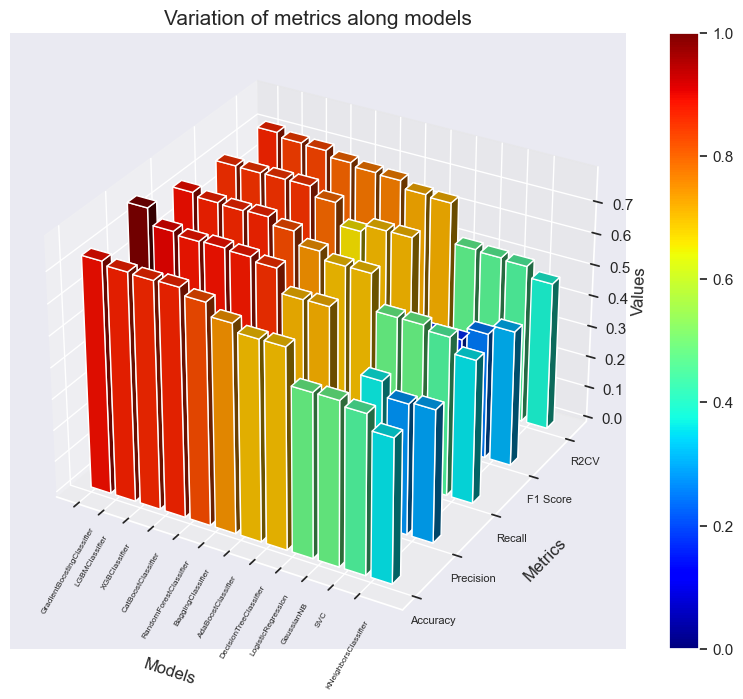

<Figure size 1500x600 with 0 Axes>

In [537]:
x = np.arange(12)
y = np.arange(5)
xpos,ypos = np.meshgrid(x,y)
z = metrics_df.to_numpy()

xpos=xpos.flatten()
ypos=ypos.flatten()
zpos=np.zeros_like(xpos)

dx=0.8*np.ones_like(xpos)
dy=0.2*np.ones_like(xpos)
dz=z.flatten()

fig=plt.figure(figsize = (11,8))
ax=fig.add_subplot(111, projection = "3d")
label = ["Values"]

ax.set_title("Variation of metrics along models", fontsize = 15)
ax.set_xticks(range(12))
ax.set_xticklabels(metrics_df.columns, fontsize = 6, rotation=60)
ax.set_xlabel("Models", labelpad=40)

ax.set_yticklabels(metrics_df.index, fontsize = 8)
ax.set_yticks(range(5))
ax.set_ylabel("Metrics",labelpad=10)

ax.set_zlabel("Values", labelpad=0)
colors = plt.cm.jet((z.flatten() - z.min()).astype(float) / (z.max() - z.min()))

bar = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= colors)

plt.figure(figsize=(15,6))
fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)

plt.show()

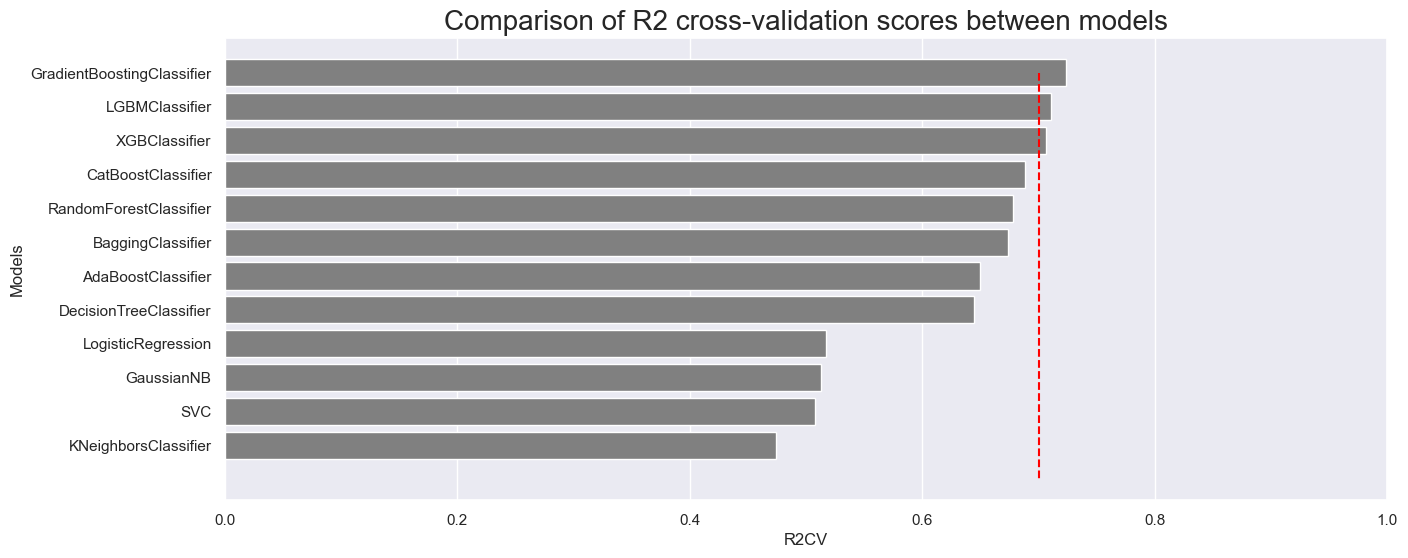

In [538]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="R2CV", y="Models", data=results_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.7, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 70%)

<b>Evaluation with Confusion matrix and ROC curves</b>

In [539]:
gb_pred = gb.predict(X_Gen_test)

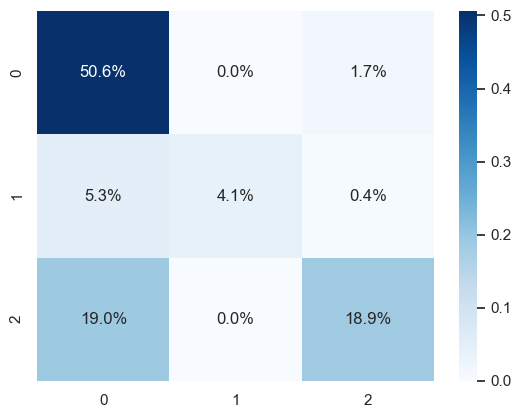

In [540]:
c_matrix = confusion_matrix(y_Gen_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

#### Train and predict with Disorder_subclass dataframe

In [541]:
log.fit(X_Sub_train, y_Sub_train)
tree.fit(X_Sub_train, y_Sub_train)
knn.fit(X_Sub_train, y_Sub_train)
nb.fit(X_Sub_train, y_Sub_train)
svm.fit(X_Sub_train, y_Sub_train)
bag_clf.fit(X_Sub_train, y_Sub_train)
ada_clf.fit(X_Sub_train, y_Sub_train)
rf.fit(X_Sub_train, y_Sub_train)
gb.fit(X_Sub_train, y_Sub_train)
xgb.fit(X_Sub_train, y_Sub_train)
cat.fit(X_Sub_train, y_Sub_train)
lgb.fit(X_Sub_train, y_Sub_train)

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Learning rate set to 0.090669
0:	learn: 2.0279793	total: 12.1ms	remaining: 12.1s
1:	learn: 1.9097681	total: 32.7ms	remaining: 16.3s
2:	learn: 1.8206238	total: 49ms	remaining: 16.3s
3:	learn: 1.7499601	total: 60.9ms	remaining: 15.2s
4:	learn: 1.6960918	total: 74.1ms	remaining: 14.8s
5:	learn: 1.6555490	total: 87ms	remaining: 14.4s
6:	learn: 1.6261492	total: 99.6ms	remaining: 14.1s
7:	learn: 1.6022444	total: 113ms	remaining: 14s
8:	learn: 1.5601190	total: 125ms	remaining: 13.8s
9:	learn: 1.5401594	total: 139ms	remaining: 13.7s
10:	learn: 1.5131514	total: 152ms	remaining: 13.7s
11:	learn: 1.4844903	total: 165ms	remaining: 13.6s
12:	learn: 1.4631240	total: 178ms	remaining: 13.5s
13:	learn: 1.4492458	total: 190ms	remaining: 13.4s
14:	learn: 1.4396231	total: 204ms	remaining: 13.4s
15:	learn: 1.4211038	total: 217ms	remaining: 13.3s
16:	learn: 1.4065043	total: 229ms	remaining: 13.2s
17:	learn: 1.3928205	total: 245ms	remaining: 13.4s
18:	learn: 1.3828230	total: 261ms	remaining: 13.5s
19:	learn:

LGBMClassifier(random_state=42)

In [542]:
lst_sub_models = []
lst_sub_accuracy = []
lst_sub_precision = []
lst_sub_recall = []
lst_sub_f1 = []
lst_sub_r2cv = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Sub_test)
    accuracy = metrics.accuracy_score(y_Sub_test, prediction)
    precision = precision_score(y_Sub_test, prediction, average="weighted")
    recall = recall_score(y_Sub_test, prediction, average="weighted")
    f1 = f1_score(y_Sub_test, prediction, average="weighted")
    R2CV = cross_val_score(model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()
   
    lst_sub_models.append(name)
    lst_sub_accuracy.append(accuracy)
    lst_sub_precision.append(precision)
    lst_sub_recall.append(recall)
    lst_sub_f1.append(f1)
    lst_sub_r2cv.append(R2CV)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("R2 Cross Validation mean: " + str(R2CV*100))
    print("--------------------------------------------------------------------------")
    print("")

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------
|LogisticRegression|
--------------------
Accuracy: 0.2662049861495845
Precision: 0.21263794031142175
Recall: 0.2662049861495845
F1 Score: 0.20390230742207985
R2 Cross Validation mean: 24.653739612188367
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.507202216066482
Precision: 0.5111974839570108
Recall: 0.507202216066482
F1 Score: 0.5087760329700699
R2 Cross Validation mean: 50.02770083102492
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.2041551246537396
Precision: 0.19658994290537748
Recall: 0.2041551246537396
F1 Score: 0.19532206694274432
R2 Cross Validation mean: 20.277008310249307
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.26011080332409975
Precision: 0.22

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----
|SVC|
-----
Accuracy: 0.26011080332409975
Precision: 0.19752562698115658
Recall: 0.26011080332409975
F1 Score: 0.20194146937179466
R2 Cross Validation mean: 24.182825484764546
--------------------------------------------------------------------------



c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(

-------------------
|BaggingClassifier|
-------------------
Accuracy: 0.4925207756232687
Precision: 0.613986468940071
Recall: 0.4925207756232687
F1 Score: 0.46256106776226036
R2 Cross Validation mean: 49.19667590027701
--------------------------------------------------------------------------



c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: Futu

--------------------
|AdaBoostClassifier|
--------------------
Accuracy: 0.5105263157894737
Precision: 0.5140759293928876
Recall: 0.5105263157894737
F1 Score: 0.5119658833960091
R2 Cross Validation mean: 50.19390581717451
--------------------------------------------------------------------------

------------------------
|RandomForestClassifier|
------------------------
Accuracy: 0.5371191135734072
Precision: 0.5883627203831834
Recall: 0.5371191135734072
F1 Score: 0.5238337038993919
R2 Cross Validation mean: 50.66481994459833
--------------------------------------------------------------------------

----------------------------
|GradientBoostingClassifier|
----------------------------
Accuracy: 0.5986149584487535
Precision: 0.6618907102886004
Recall: 0.5986149584487535
F1 Score: 0.5998865657103402
R2 Cross Validation mean: 57.39612188365651
--------------------------------------------------------------------------

---------------
|XGBClassifier|
---------------
Accuracy: 0.5911357340

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3:	learn: 1.9909841	total: 47ms	remaining: 11.7s
4:	learn: 1.9624807	total: 61.4ms	remaining: 12.2s
5:	learn: 1.9337553	total: 76.7ms	remaining: 12.7s
6:	learn: 1.8915265	total: 91.3ms	remaining: 12.9s
7:	learn: 1.8304553	total: 105ms	remaining: 13s
8:	learn: 1.8107323	total: 121ms	remaining: 13.3s
9:	learn: 1.7647696	total: 136ms	remaining: 13.4s
10:	learn: 1.7341161	total: 152ms	remaining: 13.7s
11:	learn: 1.6870677	total: 166ms	remaining: 13.7s
12:	learn: 1.6615114	total: 183ms	remaining: 13.9s
13:	learn: 1.6400296	total: 200ms	remaining: 14.1s
14:	learn: 1.6275907	total: 215ms	remaining: 14.1s
15:	learn: 1.6155771	total: 230ms	remaining: 14.2s
16:	learn: 1.6016074	total: 244ms	remaining: 14.1s
17:	learn: 1.5911431	total: 259ms	remaining: 14.1s
18:	learn: 1.5787735	total: 274ms	remaining: 14.1s
19:	learn: 1.5673894	total: 289ms	remaining: 14.2s
20:	learn: 1.5445488	total: 304ms	remaining: 14.2s
21:	learn: 1.5261383	total: 319ms	remaining: 14.2s
22:	learn: 1.5063389	total: 334ms	rema

In [543]:
results_sub_df = pd.DataFrame([lst_sub_models, lst_sub_accuracy, lst_sub_precision, lst_sub_recall,
lst_sub_f1, lst_sub_r2cv]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "R2CV"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "R2CV"]:
    results_df[col] = results_df[col].astype(float)

results_sub_df.sort_values(by="R2CV", inplace=True, ascending=False)
results_sub_df

Models  Accuracy Precision    Recall  F1 Score   
8   GradientBoostingClassifier  0.598615  0.661891  0.598615  0.599887  \
9                XGBClassifier  0.591136  0.616567  0.591136  0.588398   
11              LGBMClassifier  0.589751  0.624964  0.589751  0.587444   
10          CatBoostClassifier  0.589474  0.613642  0.589474  0.585859   
7       RandomForestClassifier  0.537119  0.588363  0.537119  0.523834   
6           AdaBoostClassifier  0.510526  0.514076  0.510526  0.511966   
1       DecisionTreeClassifier  0.507202  0.511197  0.507202  0.508776   
5            BaggingClassifier  0.492521  0.613986  0.492521  0.462561   
0           LogisticRegression  0.266205  0.212638  0.266205  0.203902   
4                          SVC  0.260111  0.197526  0.260111  0.201941   
3                   GaussianNB  0.260111  0.226658  0.260111  0.207418   
2         KNeighborsClassifier  0.204155   0.19659  0.204155  0.195322   

        R2CV  
8   0.573961  
9   0.567313  
11  0.567036  
10  0.535457  
7   0.506648  
6   0.501939  
1   0.500277  
5   0.491967  
0   0.246537  
4   0.241828  
3   0.216066  
2    0.20277

The best model for this target seems to be still GradientBoostingClassifier which implies the following scores:
- Accuracy: 0.59
- Precision: 0.66
- Recall: 0.60
- F1 Score: 0.60
- R2 Cross Validation mean: 0.57

These metrics are worse than those for the Genetic_disorder dataframe.

In [544]:
metrics_df = results_sub_df.set_index("Models").T
metrics_df

Models    GradientBoostingClassifier XGBClassifier LGBMClassifier   
Accuracy                    0.598615      0.591136       0.589751  \
Precision                   0.661891      0.616567       0.624964   
Recall                      0.598615      0.591136       0.589751   
F1 Score                    0.599887      0.588398       0.587444   
R2CV                        0.573961      0.567313       0.567036   

Models    CatBoostClassifier RandomForestClassifier AdaBoostClassifier   
Accuracy            0.589474               0.537119           0.510526  \
Precision           0.613642               0.588363           0.514076   
Recall              0.589474               0.537119           0.510526   
F1 Score            0.585859               0.523834           0.511966   
R2CV                0.535457               0.506648           0.501939   

Models    DecisionTreeClassifier BaggingClassifier LogisticRegression   
Accuracy                0.507202          0.492521           0.266205  \
Precision               0.511197          0.613986           0.212638   
Recall                  0.507202          0.492521           0.266205   
F1 Score                0.508776          0.462561           0.203902   
R2CV                    0.500277          0.491967           0.246537   

Models          SVC GaussianNB KNeighborsClassifier  
Accuracy   0.260111   0.260111             0.204155  
Precision  0.197526   0.226658              0.19659  
Recall     0.260111   0.260111             0.204155  
F1 Score   0.201941   0.207418             0.195322  
R2CV       0.241828   0.216066              0.20277

C:\Users\crist\AppData\Local\Temp\ipykernel_25912\2814543647.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(metrics_df.index, fontsize = 8)


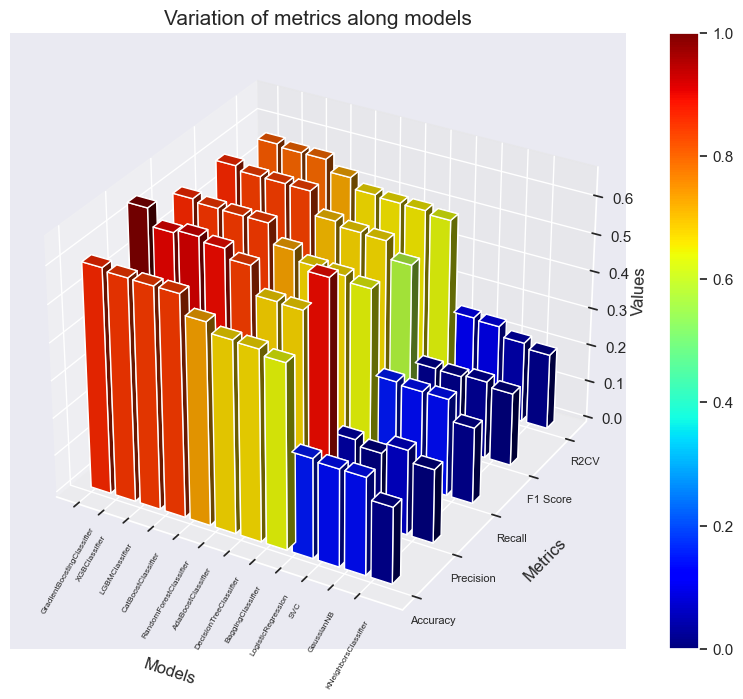

<Figure size 1500x600 with 0 Axes>

In [545]:
x = np.arange(12)
y = np.arange(5)
xpos,ypos = np.meshgrid(x,y)
z = metrics_df.to_numpy()

xpos=xpos.flatten()
ypos=ypos.flatten()
zpos=np.zeros_like(xpos)

dx=0.8*np.ones_like(xpos)
dy=0.2*np.ones_like(xpos)
dz=z.flatten()

fig=plt.figure(figsize = (11,8))
ax=fig.add_subplot(111, projection = "3d")
label = ["Values"]

ax.set_title("Variation of metrics along models", fontsize = 15)
ax.set_xticks(range(12))
ax.set_xticklabels(metrics_df.columns, fontsize = 6, rotation=60)
ax.set_xlabel("Models", labelpad=40)

ax.set_yticklabels(metrics_df.index, fontsize = 8)
ax.set_yticks(range(5))
ax.set_ylabel("Metrics",labelpad=10)

ax.set_zlabel("Values", labelpad=0)
colors = plt.cm.jet(((z.flatten() - z.min())).astype(float) / (z.max() - z.min()))

bar = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= colors)

plt.figure(figsize=(15,6))
fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)

plt.show()

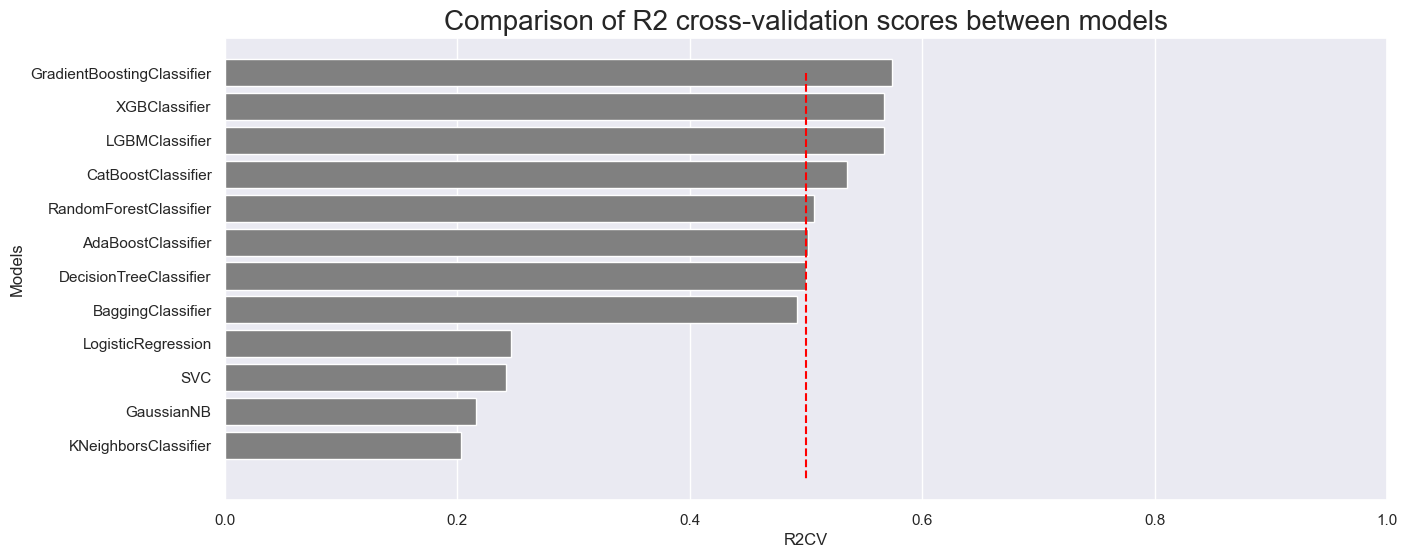

In [546]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="R2CV", y="Models", data=results_sub_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.5, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 50%), in this case all models have R2 lower than 70%

<b>Evaluation with Confusion matrix</b>

In [547]:
gb_pred = gb.predict(X_Sub_test)

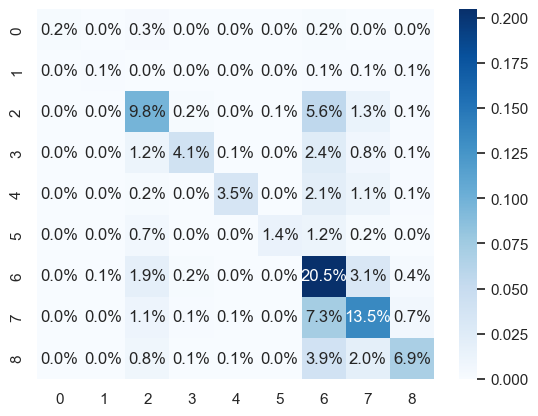

In [548]:
c_matrix = confusion_matrix(y_Sub_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

## GridSearch

Tune the model in order to find the best hyperparameters


- Genetic disorder dataframe

In [549]:
param_grid = {
    'n_estimators': [5, 10, 20, 30],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_depth': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [550]:
grid_search = GridSearchCV(gb,
                           param_grid
                          )

grid_search.fit(X_Gen_train, y_Gen_train)

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 20, 30]})

In [551]:
grid_search.best_params_

{'learning_rate': 0.7,
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 30}

In [566]:
# Gradient Boosting Classifier for Genetic Disorder Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, max_features='auto', n_estimators=30, random_state=42)
gb_Gen_model = gb.fit(X_Gen_train, y_Gen_train)

prediction = gb_Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Genetic Disorder Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

-------------------------------------------------------------
|Gradient Boosting Classifier for Genetic Disorder Dataframe|
-------------------------------------------------------------
Accuracy: 0.7371191135734072
Precision: 0.777493499938324
Recall: 0.7371191135734072
F1 Score: 0.7212820321015269
R2 Cross Validation mean: 71.66204986149584
--------------------------------------------------------------------------



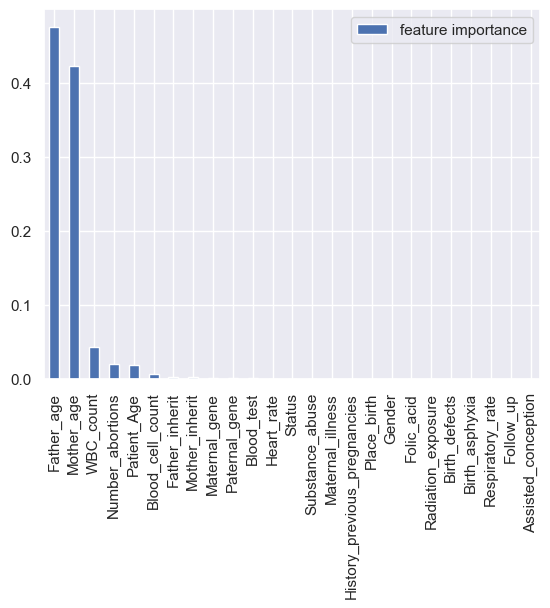

In [575]:
df_feature_importance = pd.DataFrame(gb_Gen_model.feature_importances_, index=Genetic_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');
# Father and Mother's age are the top 2 features in the model, it may be because they have the highest values. However, we have done a StandardScaler on the whole dataframe.
# Maybe it should be effective to use the log transformation of those specific columns before using the StandardScaler.

- Subclass disorder dataframe

In [586]:
grid_search = GridSearchCV(gb,
                           param_grid
                          )

grid_search.fit(X_Sub_train, y_Sub_train)

In [453]:
grid_search.best_params_

{'learning_rate': 0.5,
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 30}

In [ ]:
# Gradient Boosting Classifier for Disorder Subclass Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, max_features='auto', n_estimators=30, random_state=42)
gb_Sub_model = gb.fit(X_Sub_train, y_Sub_train)

prediction = gb_Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Disorder Subclass Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

## Clustering

In order to improve the model a first step of clustering is going to be made before the model training and fit.

Genetic disorder dataframe

In [555]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Genetic_X_scaled)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

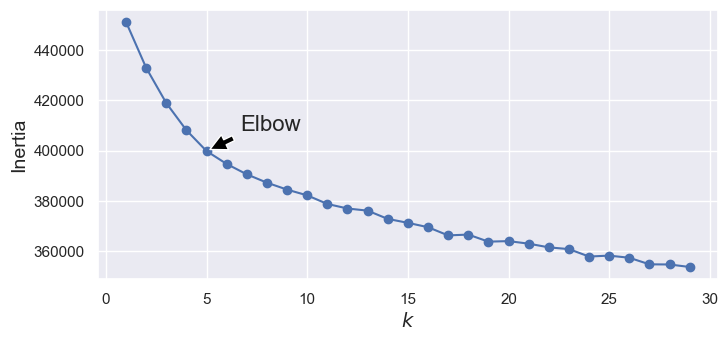

In [556]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [557]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(Genetic_X_scaled)

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [558]:
silhouette_score(Genetic_X_scaled, kmeans.labels_)

0.03372325438296902

In [559]:
silhouette_scores = [silhouette_score(Genetic_X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]


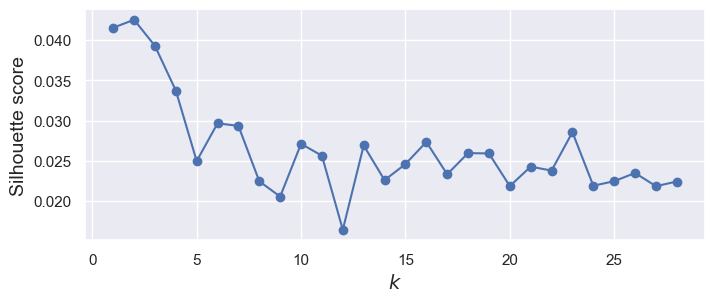

In [560]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 29), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# The optimal number of clusters is 4 (silhouette score = 0.034)
# Right before the drop in silhouette score at 5 (even if this was the value where the elbow was found)

Subclass dataframe

In [561]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Subclass_X_scaled)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

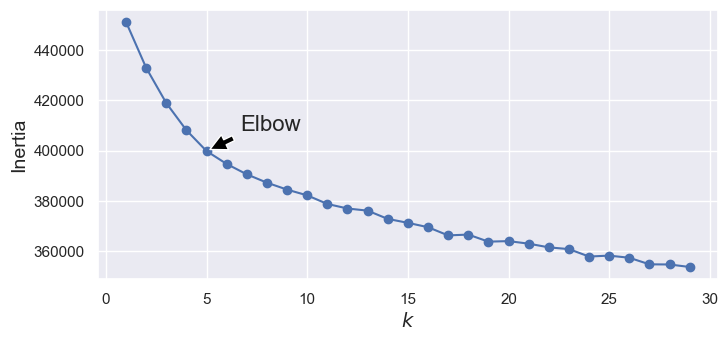

In [563]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [564]:
silhouette_score(Subclass_X_scaled, kmeans.labels_)

0.03372325438296902

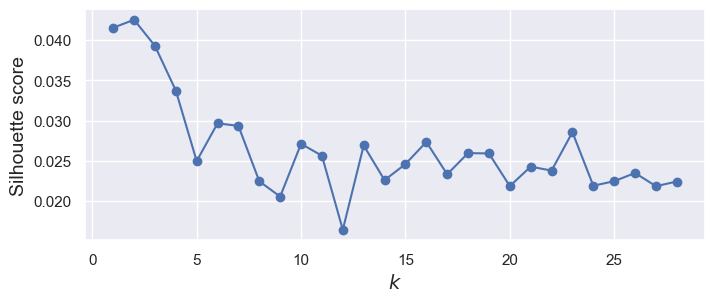

In [565]:
silhouette_scores = [silhouette_score(Subclass_X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 29), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# The optimal number of clusters is 4 (silhouette score = 0.034)
# Right before the drop in silhouette score at 5 (even if this was the value where the elbow was found)

# Pipeline and definitive model

In [585]:
# Original dataframe
df_eda
# Select columns to transform
COLS_TO_TRANSFORM = ['Father_age', 'Mother_age']

# Logaritmic transformation of specific columns
log_transform = ColumnTransformer(
    transformers=[('log', FunctionTransformer(np.log10), COLS_TO_TRANSFORM)],
    verbose_feature_names_out=False, remainder='passthrough')
log_transform.set_output(transform='pandas')

df_eda.log_transform

AttributeError: 'DataFrame' object has no attribute 'log_transform'

In [577]:
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

In [514]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=4, random_state=42)),
    ("gb", GradientBoostingClassifier(learning_rate= 0.7,  max_depth= 2,
                                    max_features= 'auto', n_estimators= 30)),
])

In [516]:
Gen_model = pipeline.fit(X_Gen_train, y_Gen_train)
pipeline.score(X_Gen_test, y_Gen_test)

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be rem

0.5213296398891967

In [520]:
name = "Clustering and Gradient Boosting"
prediction = Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
R2CV = cross_val_score(Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='a

----------------------------------
|Clustering and Gradient Boosting|
----------------------------------
Accuracy: 0.016066481994459834
Precision: 0.4582088479878307
Recall: 0.016066481994459834
F1 Score: 0.029405930435204754
R2 Cross Validation mean: 49.612188365650965
--------------------------------------------------------------------------



c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

In [517]:
Sub_model = pipeline.fit(X_Sub_train, y_Sub_train)
pipeline.score(X_Sub_test, y_Sub_test)

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be rem

0.25069252077562326

In [521]:
name = "Clustering and Gradient Boosting"
prediction = Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be rem

----------------------------------
|Clustering and Gradient Boosting|
----------------------------------
Accuracy: 0.25069252077562326
Precision: 0.19774587874730012
Recall: 0.25069252077562326
F1 Score: 0.16315446029779926
R2 Cross Validation mean: 22.465373961218837
--------------------------------------------------------------------------



c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\crist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

Metrics have been affected deeply by clustering, so it won't be used for the final modeling

In [523]:
Genetic_disorder
Disorder_subclass

Mother_inherit  Father_inherit  Maternal_gene  Paternal_gene   
Patient_Age                                                                 
2.0                     1.0             0.0            1.0            0.0  \
6.0                     1.0             0.0            0.0            0.0   
12.0                    1.0             0.0            1.0            0.0   
11.0                    1.0             0.0            1.0            1.0   
14.0                    1.0             0.0            1.0            0.0   
...                     ...             ...            ...            ...   
9.0                     0.0             1.0            1.0            1.0   
4.0                     1.0             1.0            1.0            0.0   
8.0                     0.0             1.0            0.0            1.0   
8.0                     1.0             0.0            1.0            0.0   
11.0                    1.0             0.0            0.0            0.0   

             Blood_cell_count  Mother_age  Father_age  Status   
Patient_Age                                                     
2.0                  4.760603   34.886364   42.378320     0.0  \
6.0                  4.893297   41.000000   22.000000     0.0   
12.0                 4.705280   21.000000   41.706436     1.0   
11.0                 4.720703   32.000000   40.742424     0.0   
14.0                 5.103188   34.601513   42.015587     1.0   
...                       ...         ...         ...     ...   
9.0                  5.012599   47.000000   41.706436     1.0   
4.0                  5.258298   35.000000   64.000000     1.0   
8.0                  4.974220   34.668790   56.000000     0.0   
8.0                  5.186470   35.000000   51.000000     1.0   
11.0                 4.738067   32.000000   62.000000     1.0   

             Respiratory_rate  Heart_rate  ...  Maternal_illness   
Patient_Age                                ...                     
2.0                       0.0         0.0  ...               0.0  \
6.0                       0.0         1.0  ...               0.0   
12.0                      1.0         0.0  ...               1.0   
11.0                      1.0         1.0  ...               1.0   
14.0                      0.0         0.0  ...               0.0   
...                       ...         ...  ...               ...   
9.0                       0.0         0.0  ...               0.0   
4.0                       0.0         1.0  ...               0.0   
8.0                       0.0         0.0  ...               1.0   
8.0                       1.0         0.0  ...               0.0   
11.0                      0.0         0.0  ...               1.0   

             Radiation_exposure  Substance_abuse  Assisted_conception   
Patient_Age                                                             
2.0                         0.0              0.0                  0.0  \
6.0                         1.0              0.0                  1.0   
12.0                        0.0              0.0                  1.0   
11.0                        0.0              0.0                  1.0   
14.0                        0.0              0.0                  1.0   
...                         ...              ...                  ...   
9.0                         0.0              0.0                  1.0   
4.0                         0.0              0.0                  1.0   
8.0                         0.0              0.0                  1.0   
8.0                         0.0              0.0                  0.0   
11.0                        0.0              0.0                  1.0   

             History_previous_pregnancies  Number_abortions  Birth_defects   
Patient_Age                                                                  
2.0                                   1.0          1.971910            0.0  \
6.0                                   1.0          4.000000            1.0   
12.0              

# Save the model

In [131]:
# Since none of the latter models were performing better than the Gradient Boosting model, those are going to be save
genetic_model_file = "Genetic_disorder_GB.pkl"
subclass_model_file = "Disorder_subclass_GB.pkl"

pickle.dump(genetic_model_file, open('../model/genetic_model_file', 'wb'))
pickle.dump(subclass_model_file, open('../model/subclass_model_file', 'wb'))